In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train , y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[9]

'truck'

In [11]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

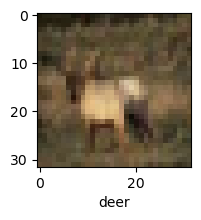

In [12]:
plot_sample(X_train,y_train,3)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.3063 - loss: 1.9276
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4182 - loss: 1.6401
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4534 - loss: 1.5448
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4672 - loss: 1.4984
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4939 - loss: 1.4347


In [18]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4865 - loss: 1.4484


[1.452059030532837, 0.4837999939918518]

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.51      0.59      0.55      1000
           1       0.72      0.51      0.60      1000
           2       0.46      0.14      0.21      1000
           3       0.30      0.47      0.37      1000
           4       0.36      0.56      0.44      1000
           5       0.42      0.29      0.35      1000
           6       0.49      0.57      0.53      1000
           7       0.62      0.49      0.55      1000
           8       0.58      0.66      0.62      1000
           9       0.60      0.56      0.58      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [19]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size = (3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    
    
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\harri\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
cnn.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8023 - loss: 0.5672
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8177 - loss: 0.5265
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8233 - loss: 0.5046
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8371 - loss: 0.4652
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8460 - loss: 0.4374
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8537 - loss: 0.4131
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8626 - loss: 0.3857
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8774 - loss: 0.3567
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8791 - loss: 0.3387
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8880 - loss: 0.3199
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8969 - loss: 0.2958
Epoch 12/20
1563

In [24]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6745 - loss: 1.9313


[1.9192882776260376, 0.6705999970436096]

In [26]:
y_test = y_test.reshape(-1)

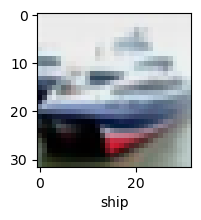

In [27]:
plot_sample(X_test,y_test,1)

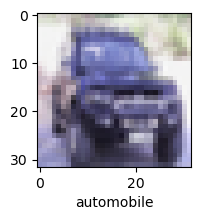

In [28]:
plot_sample(X_test,y_test,9)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:6]

[3, 9, 8, 0, 4, 6]

In [30]:
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)